# Arinthi - M-Ighty EWS Use Case.

Arinti : https://arinti.ai - Wouter Baetens

M-Igthy : http://www.m-ighty.com/



EWS stands for Early warning score (info: see [2] )

#### Data:

Dataset : 20200124_ews_observations.csv, anonimized EWS patient data from the Royal Papworth Hospital (https://royalpapworth.nhs.uk/).

###### Column Legend:

PatientId: Unique identifier for the patient

ObservationDate: Date of the observation

EwsProcedure: Which EWS procedure has been used (> in your dataset, this will normally always be NEWS2.0)

EWS_Total: Total EWS score

SBP: Systolic Blood Pressure

SBP_Score: Contribution of SBP parameter to total EWS score

LOC: Level Of Consciousness

LOC_Score: Contribution of LOC parameter to total EWS score

SpO2: Peripheral capillary oxygen saturation (the amount of oxygen in the blood)

SpO2_Score: Contribution of SpO2 parameter to total EWS score

Add_O2: Is the patient receiving additional oxygen or not

Add_O2_Score: Contribution of Add_O2 parameter to total EWS score

HR: Heartrate

HR_Score: Contribution of HR parameter to total EWS score

RR: Respiratory Rate

RR_Score: Contribution of RR parameter to total EWS score

TEMP: Patient body temperature

TEMP_Score: Contribution of TEMP parameter to total EWS score

###### References

[1] Jason Brownlee : << Introduction to Time Series Forecasting With Python
                    How to Prepare Data and Develop Models to Predict the Future >>
                 2020, ed. v1.9
                 
[2] EWS info: https://en.wikipedia.org/wiki/Early_warning_score, https://mens-en-gezondheid.infonu.nl/diversen/184941-verpleegkunde-ews-score-early-warning-system.html)

[3] NEWS2 chart 3: https://www.rcplondon.ac.uk/file/9436/download

[4] https://www.rcplondon.ac.uk/projects/outputs/national-early-warning-score-news-2

[5] NEWS2:
       https://www.independentnurse.co.uk/professional-article/how-to-read-the-news-the-new-early-warning-system/218551/

[6] NEWS2 chart: https://nhsconnect.github.io/FHIR-NEWS2/index.html

## Variables studied

Load dataset:

In [1]:
import pandas as pd
import numpy as np

#df = pd.read_csv('20200124_ews_observations.csv', dtype={'SpO2_Score': np.float32})
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)

In [2]:
#df.T

In [3]:
#df.shape

We have 171736 rows, 17 features and 1 target (EWS_Total).

In [4]:
#df.describe(include='all').T

In [5]:
#df.info()

In [6]:
#df.columns

In [7]:
#df.dtypes

In [8]:
#df.index

In [9]:
#df.isnull().sum(axis = 0)

In [10]:
#df.duplicated().any()

In [11]:
#DuplicateRowsDF = df[df.duplicated()]
#DuplicateRowsDF

In [12]:
#df[df.duplicated() == True]

In [13]:
#df[df.duplicated() == True].count()

In [14]:
# Period of measurement records:

print("Period of measurements from ", df.ObservationDate.min(), " to ", df.ObservationDate.max() )

Period of measurements from  2019-05-01 13:27:50.0000000  to  2020-01-02 09:03:56.0000000


In [15]:
# Count nbr of patients and occurences of same patient (rows per patient)

NbrOfPatients = df.PatientId.nunique()
print("Number of Patients = ", NbrOfPatients, "\n")

PatientsNbrRows = df.groupby(['PatientId'])['PatientId'].count().sort_values(ascending=False)
print("\t>= 200 records = ", PatientsNbrRows[PatientsNbrRows > 199].count())
print("\t>= 100 records = ", PatientsNbrRows[PatientsNbrRows > 99].count())
print("\t>= 50 records = ", PatientsNbrRows[PatientsNbrRows > 49].count())
print("\t>= 10 records = ", PatientsNbrRows[PatientsNbrRows > 9].count())
print("\t2 records = ", PatientsNbrRows[PatientsNbrRows == 2].count())
print("\t1 record = ", PatientsNbrRows[PatientsNbrRows == 1].count())

Number of Patients =  10136 

	>= 200 records =  34
	>= 100 records =  239
	>= 50 records =  836
	>= 10 records =  3882
	2 records =  905
	1 record =  1662


In [16]:
display(PatientsNbrRows)

PatientId
1743    643
5797    441
1261    441
630     356
1841    351
       ... 
4572      1
4561      1
4556      1
4555      1
29        1
Name: PatientId, Length: 10136, dtype: int64

In [17]:
#df[df.Add_O2.isnull() == True]

In [18]:
#df.Add_O2.dtype

In [19]:
#type(df.Add_O2)

In [20]:
#print(df[df.PatientId == 4709].count())
#print(df[df.PatientId == 5294].count())

###### from https://en.wikipedia.org/wiki/Early_warning_score :


Score	3	2	1	0	1	2	3

Respiratory rate (breaths/min)	>35	31-35	21-30	9-20			<7

SpO2 (%)	<85	85-89	90-92	>92

Temperature (C)		>38.9	38-38.9	36-37.9	35-35.9	34-34.9	<34

Systolic BP (mmHg)		>199		100-199	80-99	70-79	<70

Heart rate (bpm)	>129	110-129	100-109	50-99	40-49	30-39	<30

AVPU				Alert	Verbal	Pain	Unresponsive

In [21]:
# Check occurence of extreme values:
# see https://en.wikipedia.org/wiki/Clinical_death

#display (df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].count() )
#display(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)])

In [22]:
# Check occurence of extreme values:

#display (df[(df.HR < 30) | (df.HR > 200)].count() )
#display(df[(df.HR < 30) | (df.HR > 200)])

#### Observations

- There are 14 duplicate rows

- 4 Columns have type "object": 'ObservationDate', 'EwsProcedure', 'LOC' and 'Add_O2'

- Columns 'SBP' and 'SBP_Score' have 10787 NaN values

- Columns 'SpO2', 'SpO2_Score', 'Add_O2' and 'Add_O2_Score' have 2 NaN values

- Column 'EwsProcedure' has only 1 value: 'NEWS2'
 
- Column 'EWS_Total' has 20 values (0-19)

- Column 'LOC' has 5 values :  {'ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'}

- Column 'LOC_Score' has 2 values: {0, 3}

- Column 'SpO2_Score' has 5 values: {0.0, 1.0, 2.0, 3.0, nan, nan}  -- nan is shown twice ???

- Column 'Add_O2' has 3 values: {False, True, nan}

- Column 'Add_O2_Score' has 3 values: {0.0, nan, 2.0, nan} -- nan is shown twice ???

- Column 'HR_Score', 'RR_Score' and 'TEMP_Score' have 4 values: {0, 1, 2, 3}

- Column 'TEMP' shows values 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6,  24.4, 27.8, 33.0, 33.9, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 50.0.
  The temperatures 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6, 50.0 occur once. Assume these are faulty measurements.
          Is that possible (assuming temperature in Celsius/Centigrade scale)?
          Does the dataset include dead people? apparantly not
          
- Column 'HR' shows values 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 198, 199, 200, 208, 210, 239, 252
          Is that possible?
          
- Columns SBP_Score, LOC_Score, SpO2_Score, Add_O2_Score, HR_Score, RR_Score, TEMP_Score are categories derived from base data.

- Out of the 10136 patients 9897 have less than 100 records, 6254 have less than 10 records


#### Convert some data columns and cleanup

In [23]:
# Convert 'ObservationDate' column to datetime format:
df.ObservationDate = pd.to_datetime(df.ObservationDate)

In [24]:
# remove column 'EwsProcedure', as it has only 1 value:

df = df.drop(columns=['EwsProcedure'])

In [25]:
# remove duplicate rows:
df.drop_duplicates()

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05,3,88.0,3.0,ALERT,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0
171732,20480,2020-01-02 08:58:46,3,83.0,3.0,ALERT,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171733,2499,2020-01-02 09:03:14,0,118.0,0.0,ALERT,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171734,20527,2020-01-02 09:03:20,0,129.0,0.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0


In [26]:
# Remove records with faulty temperature readings:

df.drop(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].index, inplace=True)

In [27]:
# Remove records with NULL values:

df = df.dropna(how='any')

In [28]:
#df.shape

In [29]:
# Vectorize 'LOC' column
df['LOC'].replace(to_replace=['ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'], value=[1, 2, 3, 4, 5], inplace=True)

In [30]:
#df.dtypes

In [31]:
# Vectorize 'Add_O2' column
df['Add_O2'].replace(to_replace=[False, True], value=[0, 1], inplace=True)

In [32]:
#df.dtypes

In [33]:
#re-index rows:
df = df.reindex()

In [34]:
#df.shape

In [35]:
#df.T

In [36]:
#df.dtypes

In [37]:
#UniqueValues(df)

In [38]:
#df.describe(include='all').T

### Relationship between variables

##### Base Data

In [39]:
#PatientData = df[['PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

#EWS = df[['EWS_Total']]

In [40]:
#display(PatientData)
#display(EWS)
#print(PatientData.shape, EWS.shape)

##### Display Data correlation

pd.plotting.scatter_matrix(PatientData, alpha=0.2, figsize=(12,12))

In [41]:
#PatientData.corr()

In [42]:
#DataSubset = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
#DataSubset.shape

pd.plotting.scatter_matrix(DataSubset, alpha=0.2, figsize=(12,12))

import seaborn as sns

sns.pairplot(DataSubset, diag_kind="hist")

In [43]:
#DataSubset.corr()

Data correlation between de base data is very low.

Check correlation between base data and target EWS value:

In [44]:
#DataSubsetWithEWS = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP', 'EWS_Total']]

In [45]:
import seaborn as sns

#sns.pairplot(DataSubsetWithEWS, diag_kind="hist")

In [46]:
#DataSubsetWithEWS.corr()

Correlation between the base data and the target EWS value is average to low:

- Add_O2:  61,5%
- HR:      41,9%
- RR:      38,7%
- SBP:    -35,1%
- Sp02:   -27,2%
- LOC:     13,2%
- TEMP:    13,1%

## Modelling the data

In [47]:
def Scores(Values):
    # Convert Vital parameters into scores
    # Order of Values has to be 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP'
    #
    # Values : 1 dim array (one set of measurements)
    # See [3], [6], [5], [4]
    #
    #  EWS_Total: Total EWS score
    #  SBP: Systolic Blood Pressure
    #  SBP_Score: Contribution of SBP parameter to total EWS score
    #  LOC: Level Of Consciousness
    #  LOC_Score: Contribution of LOC parameter to total EWS score
    #  SpO2: Peripheral capillary oxygen saturation (the amount of oxygen in the blood)
    #  SpO2_Score: Contribution of SpO2 parameter to total EWS score
    #  Add_O2: Is the patient receiving additional oxygen or not
    #  Add_O2_Score: Contribution of Add_O2 parameter to total EWS score
    #  HR: Heartrate
    #  HR_Score: Contribution of HR parameter to total EWS score
    #  RR: Respiratory Rate
    #  RR_Score: Contribution of RR parameter to total EWS score
    #  TEMP: Patient body temperature
    #  TEMP_Score: Contribution of TEMP parameter to total EWS score
    
    # In the data cleanup the LOC/AVPU value has been mapped as follows:
    # df['LOC'].replace(to_replace= \
    # ['ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'], value=[1, 2, 3, 4, 5], inplace=True)
    # and the Add_O2:
    # df['Add_O2'].replace(to_replace=[False, True], value=[0, 1], inplace=True)
    
    #Column numbers :
    SBP_Score = 0
    LOC_Score = 1
    SpO2_Score = 2
    Add_O2_Score = 3
    HR_Score = 4
    RR_Score = 5
    TEMP_Score = 6
    EWS_Total = 7
    
    # Vital Parameters :
    SBP = Values[SBP_Score]
    LOC = Values[LOC_Score]   # = AVPU value, actually ACVPU
    SpO2 = Values[SpO2_Score]
    Add_O2 = Values[Add_O2_Score]
    HR = Values[HR_Score]
    RR = Values[RR_Score]
    TEMP = Values[TEMP_Score]
    
    #print(SBP, LOC, SpO2, Add_O2, HR, RR, TEMP)
    
    AllScores = np.zeros([len(Values) +1, 1], dtype=int)
    
    if SBP<=90:
        AllScores[SBP_Score] = 3
    elif 91<=SBP<=100:
        AllScores[SBP_Score] = 2
    elif 101<=SBP<=110:
        AllScores[SBP_Score] = 1
    elif 111<=SBP<=219:
        AllScores[SBP_Score] = 0
    elif SBP>220:
        AllScores[SBP_Score] = 3
    
    if LOC == 1:
        AllScores[LOC_Score] = 0
    elif LOC == 2:
        AllScores[LOC_Score] = 3   # ACVPU seems to work differently than AVPU
    elif LOC == 3:
        AllScores[LOC_Score] = 3
    elif LOC == 4:
        AllScores[LOC_Score] = 3        
    elif LOC == 5:
        AllScores[LOC_Score] = 3

    if SpO2 <83:
        AllScores[SpO2_Score] = 3
    elif 84<=SpO2<=85:
        AllScores[SpO2_Score] = 2
    elif 86<=SpO2<=87:
        AllScores[SpO2_Score] = 1
    elif 88<=SpO2<=92:
        AllScores[SpO2_Score] = 0
    elif 93<=SpO2<=94:
        AllScores[SpO2_Score] = 1
    elif 95<=SpO2<=96:
        AllScores[SpO2_Score] = 2        
    elif SpO2>97:
        AllScores[SpO2_Score] = 3
    
    if Add_O2 == 1:
        AllScores[Add_O2_Score] = 2
    else:
        AllScores[Add_O2_Score] = 0
        
    if HR<=40:
        AllScores[HR_Score] = 3
    elif 41<=HR<=50:
        AllScores[HR_Score] = 1
    elif 51<=HR<=90:
        AllScores[HR_Score] = 0
    elif 91<=HR<=110:
        AllScores[HR_Score] = 1
    elif 111<=HR<=130:
        AllScores[HR_Score] = 2  
    elif HR>=131:
        AllScores[HR_Score] = 3  
    
    if RR<=8:
        AllScores[RR_Score] = 3
    elif 9<=RR<=11:
        AllScores[RR_Score] = 1
    elif 12<=RR<=20:
        AllScores[RR_Score] = 0
    elif 21<=RR<=24:
        AllScores[RR_Score] = 2  
    elif RR>=25:
        AllScores[RR_Score] = 3  
    
    if TEMP<=35.0:
        AllScores[TEMP_Score] = 3
    elif 35.1<=TEMP<=36.0:
        AllScores[TEMP_Score] = 1
    elif 36.1<=TEMP<=38.0:
        AllScores[TEMP_Score] = 0
    elif 38.1<=TEMP<=39.0:
        AllScores[TEMP_Score] = 1  
    elif TEMP>=39.1:
        AllScores[TEMP_Score] = 2
        
    EWS = np.sum(AllScores)    
    AllScores[EWS_Total] = EWS    
    #print(AllScores)
        
    return(AllScores)
  

### Modelling time series

In [48]:
print(PatientsNbrRows[PatientsNbrRows > 100].count())
print(PatientsNbrRows[PatientsNbrRows > 200].count())
print(PatientsNbrRows[PatientsNbrRows > 300].count())
print(PatientsNbrRows[PatientsNbrRows > 400].count())

235
33
8
3


##### Plot timeseries of individual patients in one plot

In [49]:
PatientTimeSeries = PatientsNbrRows[PatientsNbrRows > 200]
display(PatientTimeSeries)

PatientId
1743    643
5797    441
1261    441
630     356
1841    351
1199    310
3080    305
6995    305
1092    284
523     278
1285    276
1068    274
1753    270
1257    268
4672    264
3553    257
362     252
5447    250
1835    243
6764    236
2193    229
6755    225
4764    222
5678    220
3174    218
3433    218
1474    217
1664    215
4614    209
1278    206
7777    206
2602    205
3540    203
Name: PatientId, dtype: int64

##### Select subset of patients with sufficient date-time features

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474, 1664, 1743, 1753, 1835, 1841, 2193, 2602, 3080, 3174, 3433, 3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995, 7777]


/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


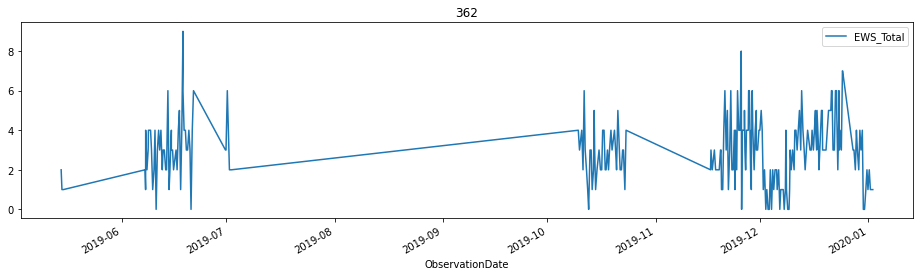

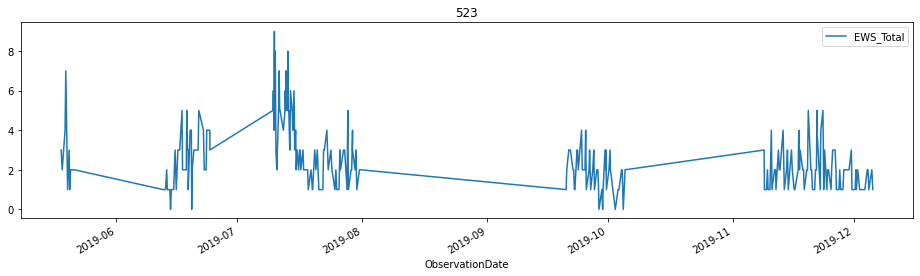

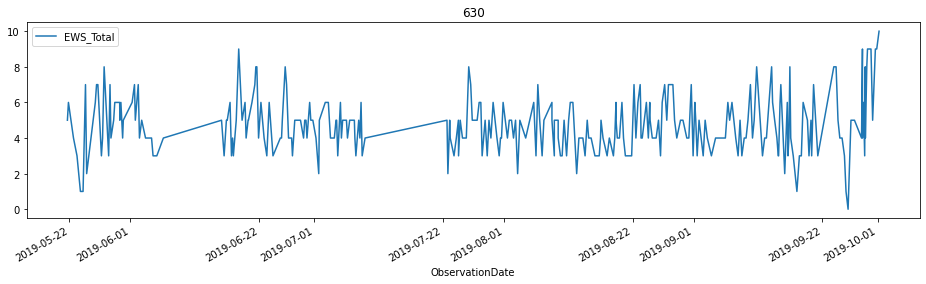

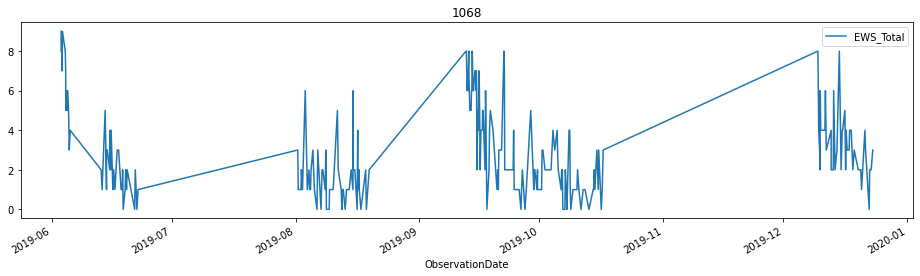

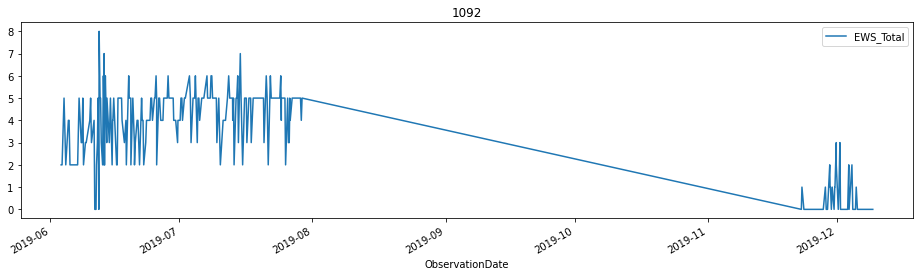

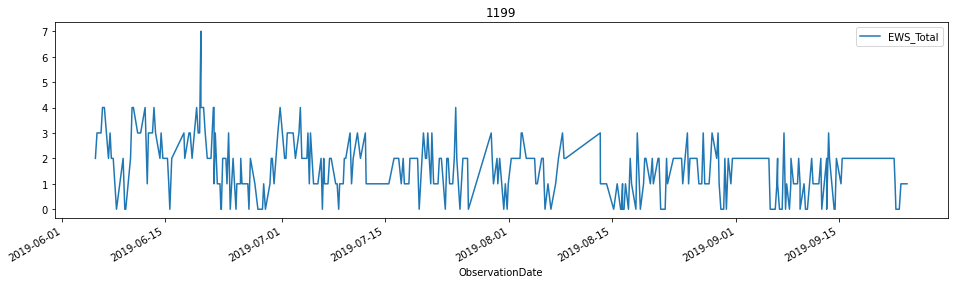

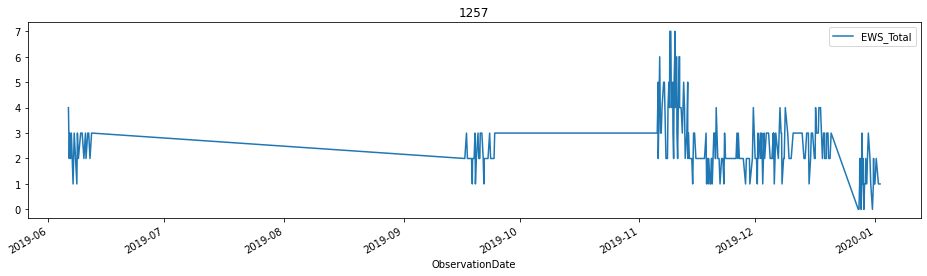

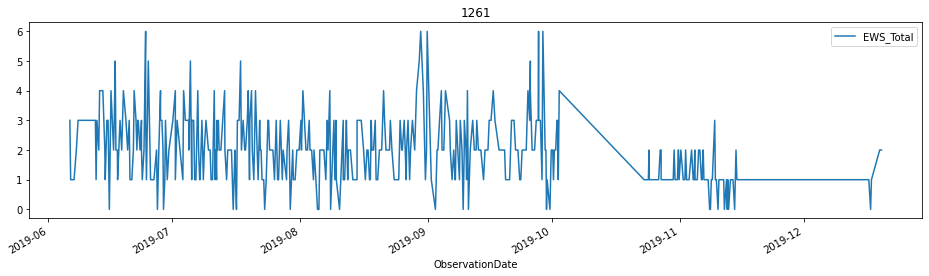

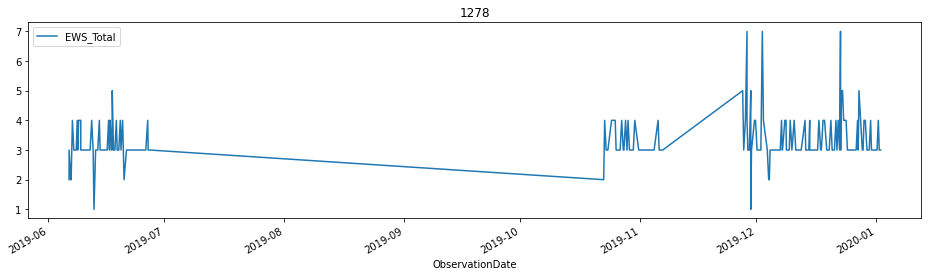

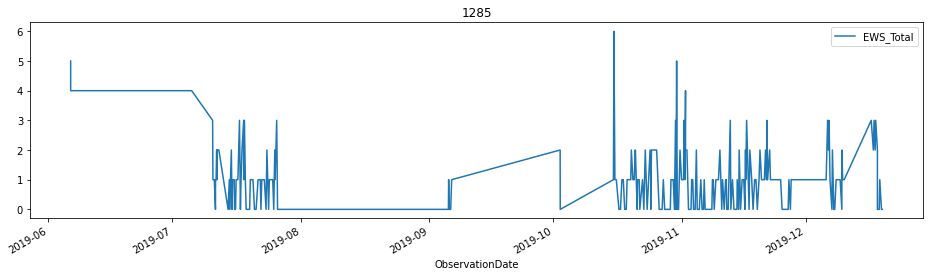

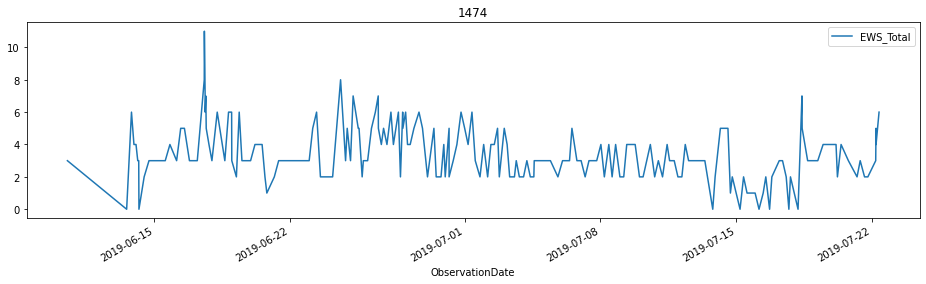

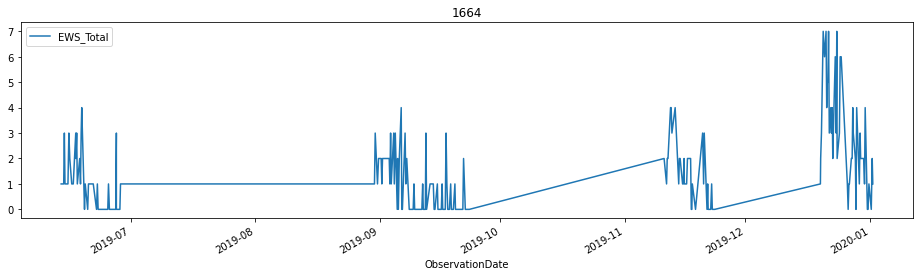

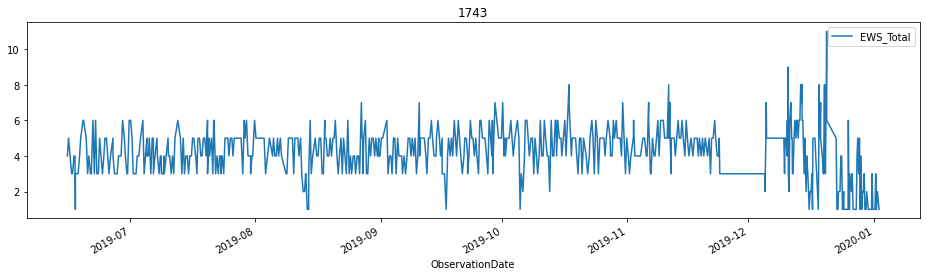

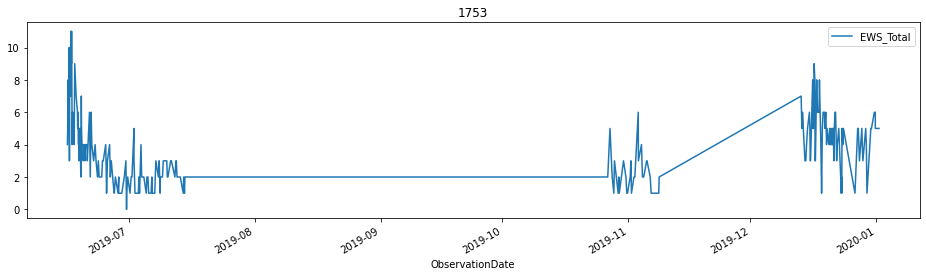

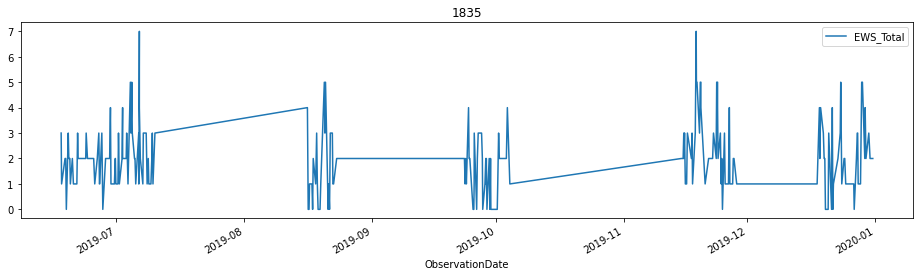

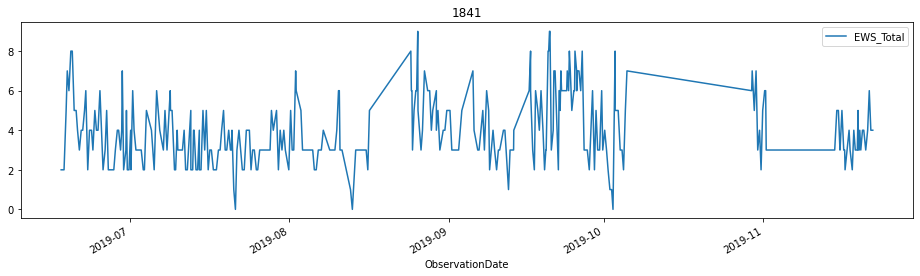

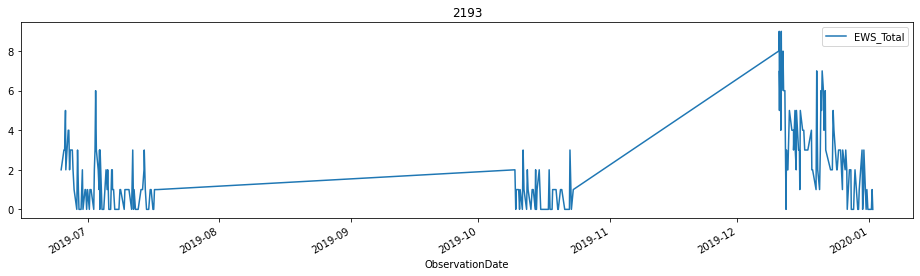

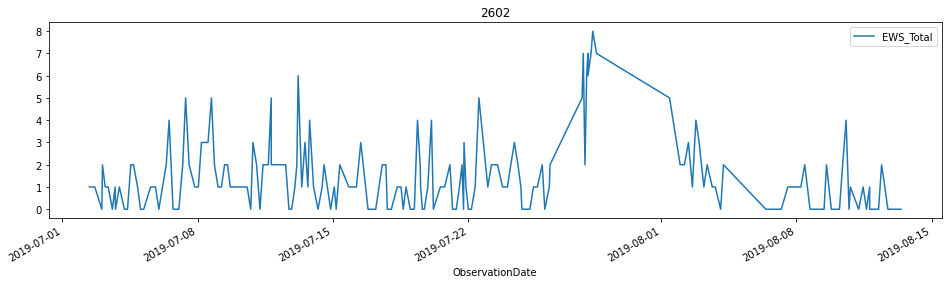

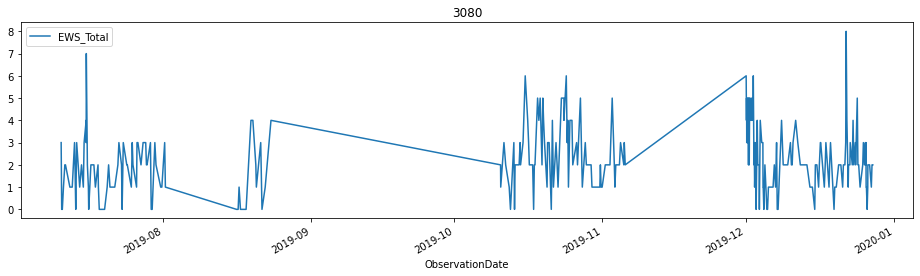

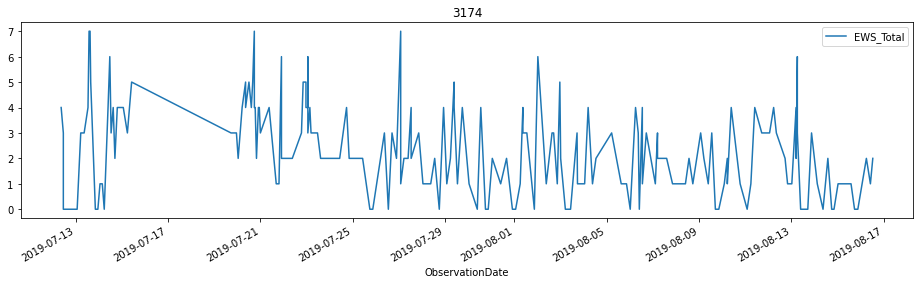

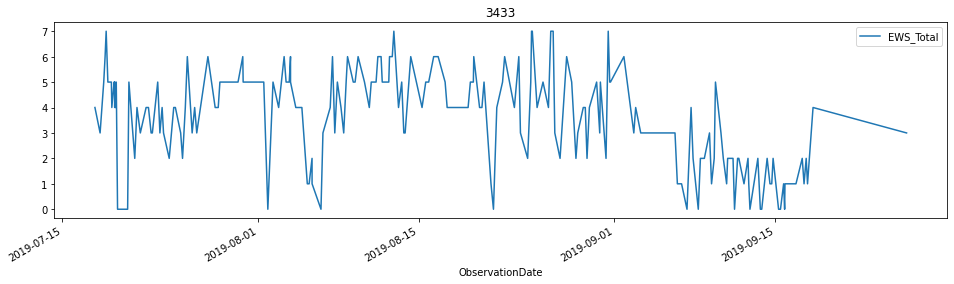

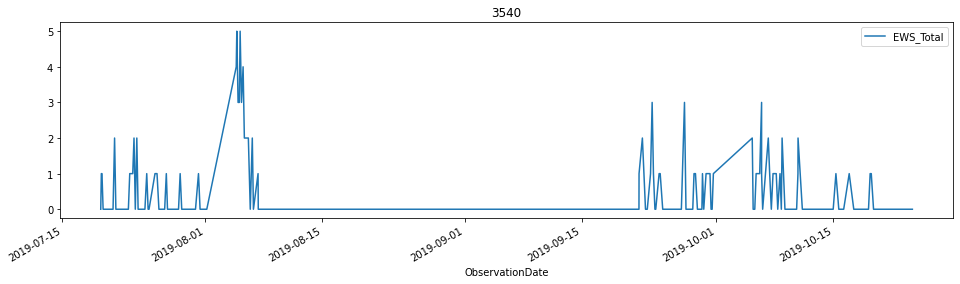

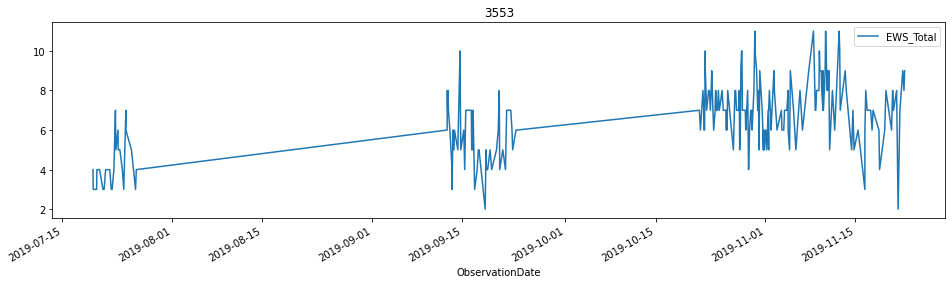

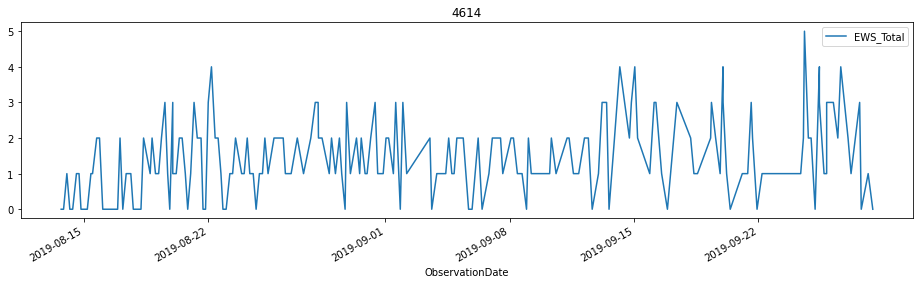

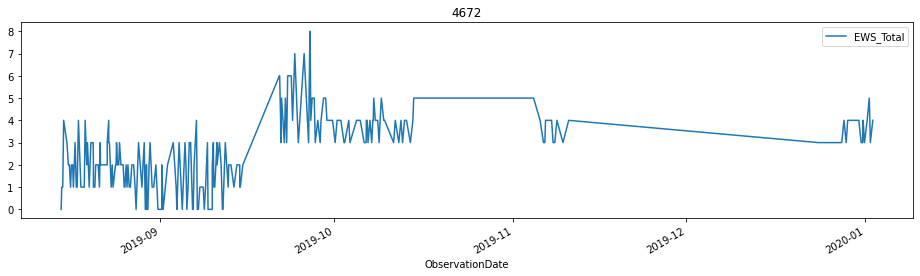

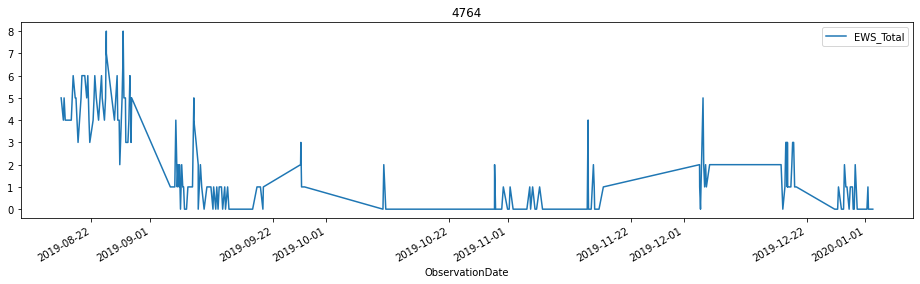

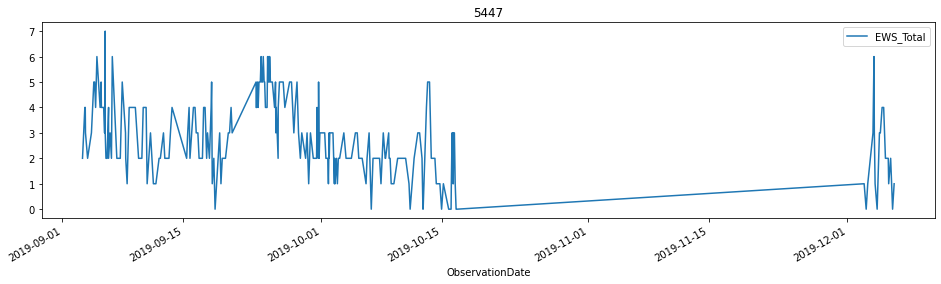

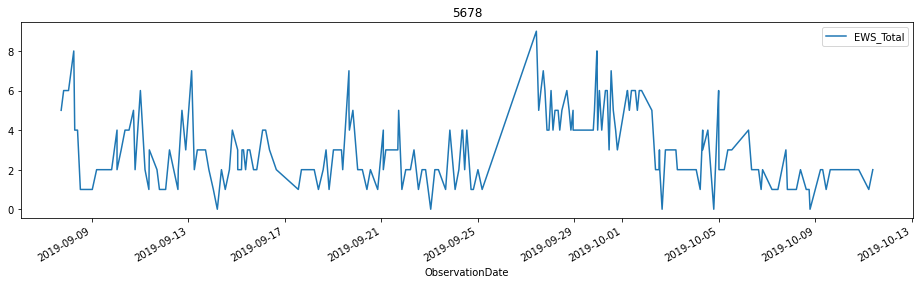

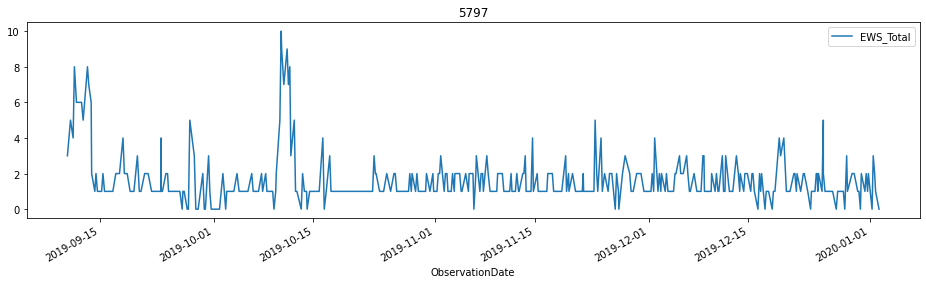

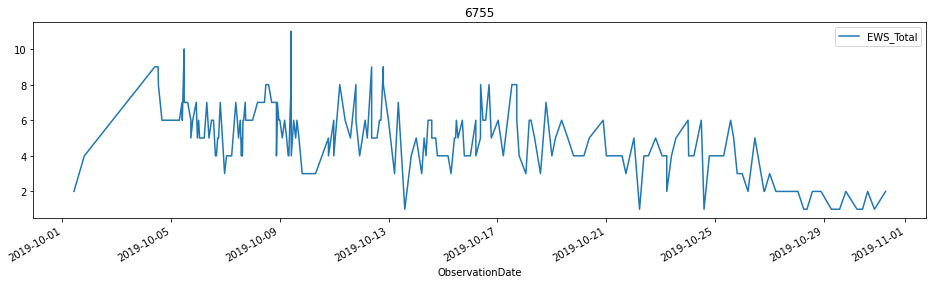

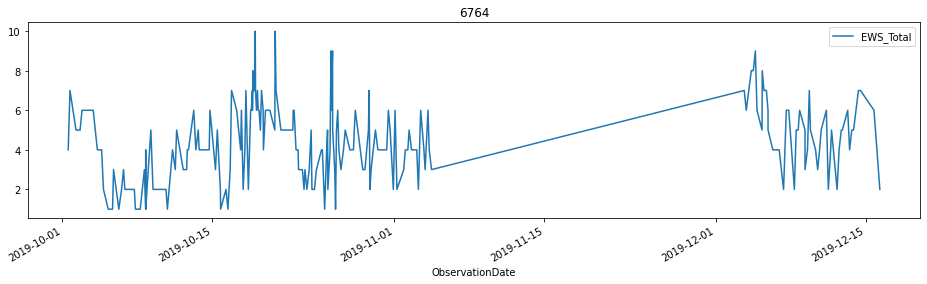

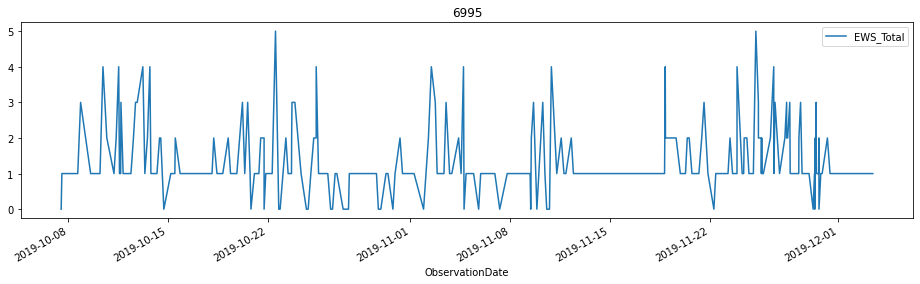

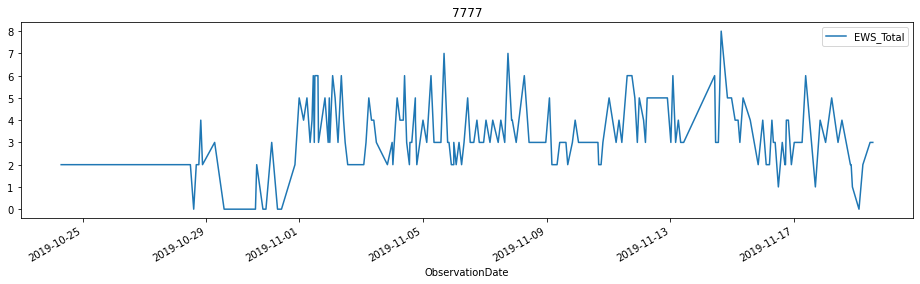

In [50]:
PatientSubset = PatientsNbrRows[PatientsNbrRows > 200]
PatientSubsetList = PatientSubset.index.tolist()
#print(PatientSubsetList)
#print(type(PatientSubsetList), type(PatientSubsetList[0]) )
PatientSubsetList.sort()
print(PatientSubsetList)

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient]
    #display(OnePatient)
    OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
    #display(OnePatient)
    OnePatient = OnePatient.set_index('ObservationDate')
    OnePatient.plot(title = patient, figsize=(16,4))
    

###### Observation
Measurements were made at different intervals: some are days, weeks or months apart 

All the patients shown togheter: there is no coherence.

#### Autocorrelation plots

Continue with patient 7777 with daterange ('2019-10-28', '2019-11-19') as first experiment.

###### Rolling Forecast ARIMA Model

###### EWS only

To compare with the linear regression, only forecast the last 3 measurements:

After rounding, all EWS predictions are 1 off. 

In [51]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def RunARIMA(Train, Test, p, d, q):
    # Determine the Arima model for Train data with base parameters p,d,q.
    
    # walk-forward validation
    predictions = list()
    history = [x for x in Train]
    for t in range(len(Test)):
        model = ARIMA(history, order=(p,d,q)) # on each run the ARIMA model is retrained. history gets one more element - see below
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = Test[t]
        history.append(obs)                  # <= at each run history gets one more element from the Test set appended ????
        # print( ' predicted=%f, expected=%f ' % (yhat, obs)) # >>>>> predictions are not rounded !!!!
    
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(Test, predictions))
    #print( ' Test RMSE: %.3f ' % rmse)
    
    return(model, predictions, rmse)

##### PDQ for each vital parameter

PDQ values with RMSE based on patient 7777:

           Vital      PDQ    RMSE
           Param.
          ------------------------
Jens :     SP02 :   (0,0,0) 15.211
           RR:      (1,1,3)  2.895
Idrees :   Add_O2 : (1,1,1)  0.317
           HR :     (3,0,1)  6.695
           TEMP :   (1,1,1)  0.258      
Maryame:   SBP :    (2,1,1) 11.173
           LOC :    (0,1,0)  0.000
           
Surprisingly 5 have a d value of 1, whereas ADF indicated 0 for all vital parameters

In the defined order of usage:

'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP' = [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)]

Now, need to check these pdq values on other patients

###### Arima full Vital Parameter EWS forecast

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def RunARIMA(Train, Test, p, d, q):
    # Determine the Arima model for Train data with base parameters p,d,q.
    
    # walk-forward validation
    predictions = list()
    history = [x for x in Train]
    for t in range(len(Test)):
        model = ARIMA(history, order=(p,d,q)) # on each run the ARIMA model is retrained. history gets one more element - see below
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = Test[t]
        history.append(obs)                  # <= at each run history gets one more element from the Test set appended ????
        # print( ' predicted=%f, expected=%f ' % (yhat, obs)) # >>>>> predictions are not rounded !!!!
    
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(Test, predictions))
    #print( ' Test RMSE: %.3f ' % rmse)
    
    return(model, predictions, rmse)

In [53]:
def PlotArimaUni(Actual, predictions, NbrPredictions, Title):
    
    # make sure the predictions are in the same position as the test data    
    Predictions = np.full(len(Actual), None)
    #size = int(len(X) * 0.66)
    #Predictions[size:len(X)] = predictions
    Predictions[-NbrPredictions:] = predictions
    Predictions = Predictions.reshape(len(Predictions),1) 
    #print(Predictions)
    #display(Actual)
    DF = Actual
    DF = DF.add_prefix('Actual ')
    DF['Prediction'] =  Predictions
    #display(DF)
        
    figure = plt.figure(1, figsize = (16, 4))
    #plt.plot(Actual)   # original data
    #plt.plot(Pred, color='red') # Predictions
    ax = DF.plot(figsize = (16, 4))
    #Pred.plot(ax=ax)
    plt.title(Title)
    plt.xlabel('Date')
    # plt.ylabel('EWS')
    plt.show()
    
    return(None)

In [133]:
def MatchScore(Predictions, Actual):
    # List number of accurate, 1 off, 2 off, etc predicted EWS values
    
    Original = Actual[-(Predictions.shape[0]):]
    Difference = np.abs(Predictions - Original.T)
    #print(Original.T, "\n\n", Predictions, "\n\n", Difference)    
    Unique, Counts = np.unique(Difference, return_counts=True)
    
    d = dict(zip(Unique, Counts))
    # Complete dictionary:
    for i in range(3):
        if not (i in d.keys() ):
            d[i] = 0   
    #print(d)
    
    return(d)

In [163]:
import datetime as dt
from datetime import timedelta
from dateutil.parser import parse
import numpy as np

import warnings

warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline


def PredictValueARIMA(Target, NbrPredictions, PDQset):
    # Make a linear regression on the given Target
    
    Target = Target.to_numpy()
    Target = Target.reshape(len(Target),1)
    
    # Split the data. Keep last NbrPredictions as test values
    y_Train = Target[:-NbrPredictions]
    y_Test = Target[-NbrPredictions:]
        
    #print("X_Train: ", X_Train.T, "\nX_Test: ", X_Test.T, "\ny_Train: ", y_Train.T, "\ny_Test: ", y_Test.T)
    #print(Dates.shape, Target.shape, X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)
    #print(Target.shape, y_Train.shape, y_Test.shape)
    #print(type(X_Train), X_Train[0], type(X_Train[0]), X_Train.shape, type(X_Train[0][0]))
    #print(type(X_Test), X_Test[0], type(X_Test[0]), X_Test.shape, type(X_Test[0][0]))
    
    ArimaModel, Prediction, RMSE = RunARIMA(y_Train, y_Test, PDQset[0], PDQset[1], PDQset[2])
    
    #print("Prediction: ", Prediction, len(Prediction))
    
    return(ArimaModel, Prediction, RMSE) 


def EWSmultiARIMA(patient, DateRange, NbrPredictions, PDQlist):
    # Predict NbrPredictions future values of EWS based on a timeseries of previous Vital Parameter values for 
    # one patient on a specific date range.
    # Each Vital Parameter prediction is plotted seperatly followed by a plot of all EWS scores.
    #
    # This function is intended to compare predictions to actual values. It does not make predictions in the future.
    #

    #print(type(DateRange), type(DateRange[0]), type(parse(DateRange[0])))
    
    OnePatient = df[ (df['PatientId'] == patient) & \
                     (df['ObservationDate'] >= parse(DateRange[0])) &  \
                     (df['ObservationDate'] <= parse(DateRange[1]) + timedelta(days=1) ) \
                   ]
    #display(OnePatient)
    
    print("\nPatientID = ", patient, ",  Nbr of Observations = ", OnePatient.shape[0] , "\n")
    Dims = OnePatient[['ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']].set_index('ObservationDate').sort_index()
    # keep last NbrPredictions dates in datetime form:
    y_Pred_dt = Dims.tail(NbrPredictions)
    #print("y_Pred_dt = ", y_Pred_dt, y_Pred_dt.shape)
    Dates = OnePatient.ObservationDate.map(dt.datetime.toordinal)
    Targets = OnePatient[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
    
    #display(OrigScores)

    # Linear regression for each of the vital parameters seperatly:
    Predictions = np.empty([NbrPredictions, Targets.shape[1]])
    #print(Predictions.shape)
    for i in range(Targets.shape[1]):
        #print(i, Targets.iloc[:, [i]], Targets.iloc[:, [i]].shape)
        ArimaModel, Predictions[:,i], RMSE = \
                         PredictValueARIMA(Targets.iloc[:, [i]], NbrPredictions, PDQlist[i])
        Predictions[:,i] = Predictions[:,i].ravel()
        Name = list(Targets.iloc[:, [i]].columns)[0]
        #print(Name)
        Title = "PatientID = " + str(patient) + " - " + Name + " - RMSE = " + str(RMSE)
        PlotArimaUni(Dims[[Name]], Predictions[:,i], NbrPredictions, Title)
    #print(Predictions, Predictions.shape)
    
    scores = np.zeros([Predictions.shape[0], Predictions.shape[1]+1], dtype=int)
    #print(scores.shape)
    for j in range(len(Predictions)):
        #hlp = Scores(Predictions[j])
        #print(hlp.T, hlp.T.shape, scores[j].shape)
        #hlp.reshape(len(hlp),1)
        scores[j] = Scores(Predictions[j]).T
    #print(scores)

    #OrigScores = OnePatient[['ObservationDate', \
    #                       'SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', 'RR_Score', 'TEMP_Score',\
    #                       'EWS_Total']].set_index('ObservationDate')
    OrigEWSScores = OnePatient[['ObservationDate', 'EWS_Total']].set_index('ObservationDate')
    #print(np.round(Prediction))
    #print(y_Test)
    #display(y_Pred_dt)
    #y_Pred_dt[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']] = Predictions
    #y_Pred_dt[['SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', \
    #           'RR_Score', 'TEMP_Score', 'EWS_Total']] = scores
    #display(y_Pred_dt)
    
    # Plot original and predicted data scores
    

    #PredScores = \
    #   y_Pred_dt[['SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', 'RR_Score', 'TEMP_Score', 'EWS_Total']]
    
    figure = plt.figure(1, figsize = (16, 8))
    #plt.plot(OrigScores, linestyle='dashed')   # original data
    #plt.plot(PredScores) # Predictions
    #plt.plot(scores)
    Title = "PatientID = " + str(patient) + " - EWS"
    PlotArimaUni(OrigEWSScores, scores[:,-1], NbrPredictions, Title)
    #plt.xlabel('Observation Dates')
    #plt.ylabel('EWS Scores')
    #plt.title(patient)
    #ax = plt.gca()
    #ax.legend(loc='upper center', fontsize='x-large')
        
    plt.show()
    
    #print(OnePatient.EWS_Total.max())
        
    TrainScore = MatchScore(np.round(scores[:,-1]), OrigEWSScores.to_numpy())
    #print(TrainScore, type(TrainScore[0]))

    #Percentages:
    print("EWS Score prediction :\n")
    Divider = scores.shape[0]
    #print(Divider, type(Divider))
    print("Accurate = \t\t", (TrainScore[0]/Divider)*100, "%")
    print("Accurate + 1 off = \t", ((TrainScore[0] + TrainScore[1])/Divider)*100, "%")
    print("Accurate + max 2 off = \t", ((TrainScore[0] + TrainScore[1] + TrainScore[2])/Divider)*100, "%")

    return(None)    


PatientID =  7777 ,  Nbr of Observations =  191 



<Figure size 1152x288 with 0 Axes>

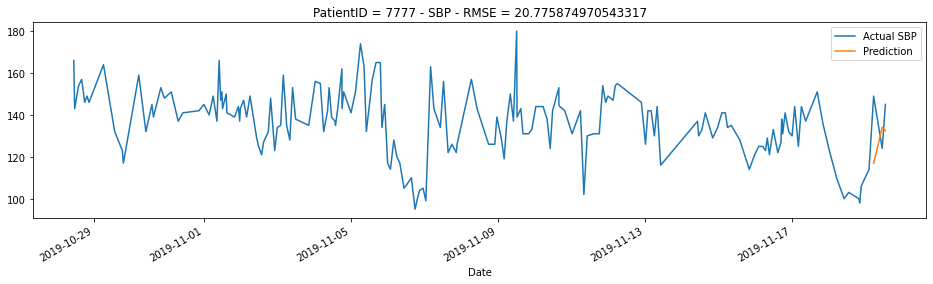

<Figure size 1152x288 with 0 Axes>

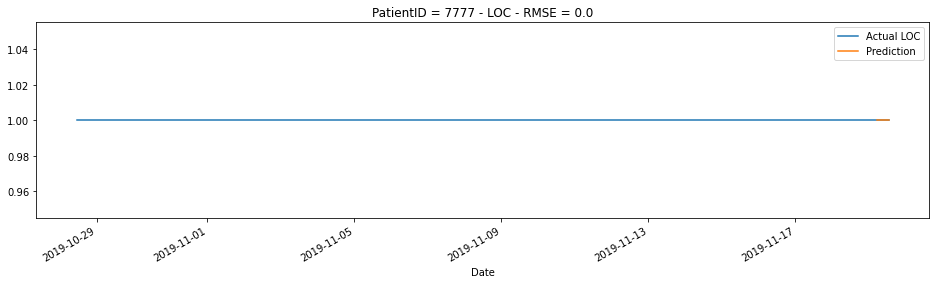

<Figure size 1152x288 with 0 Axes>

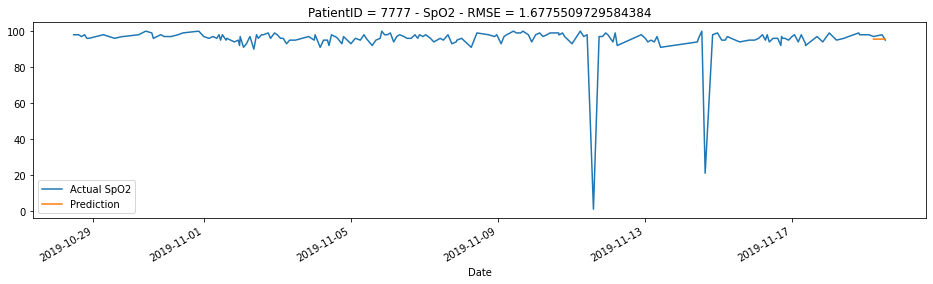

<Figure size 1152x288 with 0 Axes>

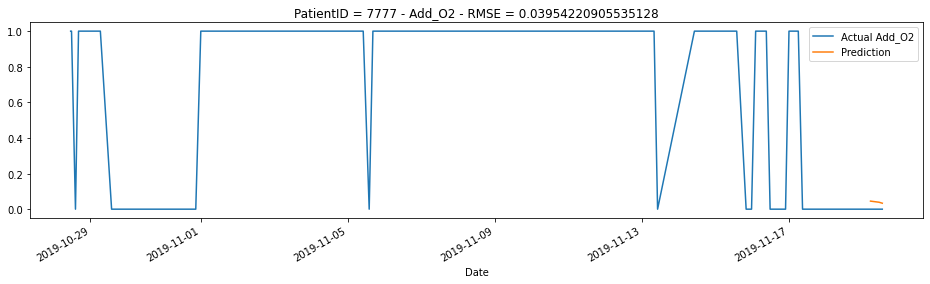

<Figure size 1152x288 with 0 Axes>

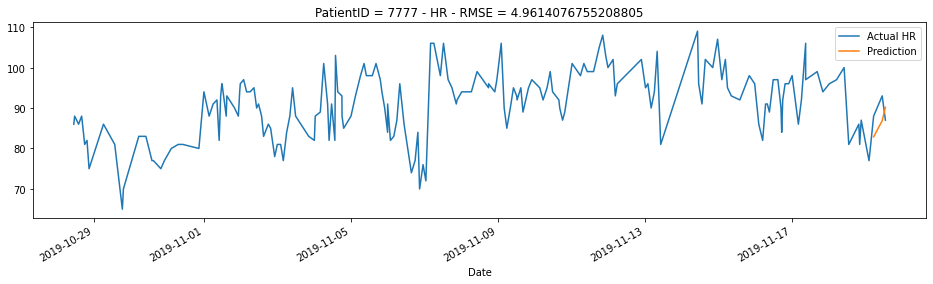

<Figure size 1152x288 with 0 Axes>

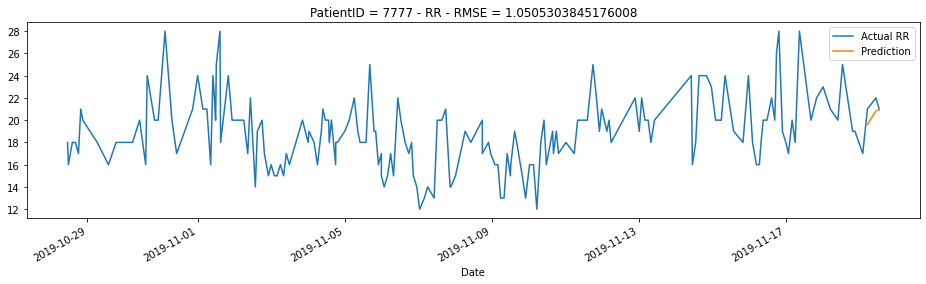

<Figure size 1152x288 with 0 Axes>

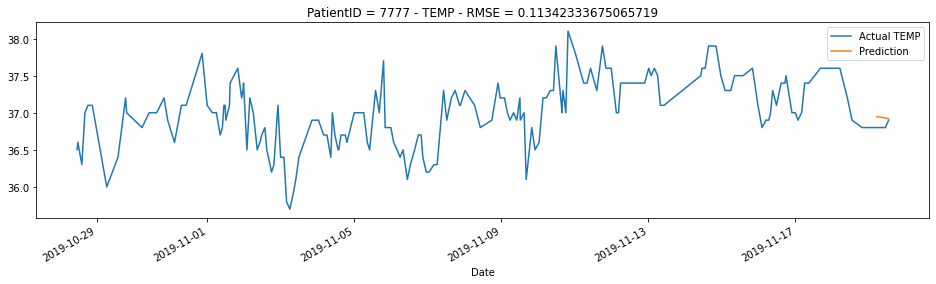

<Figure size 1152x576 with 0 Axes>

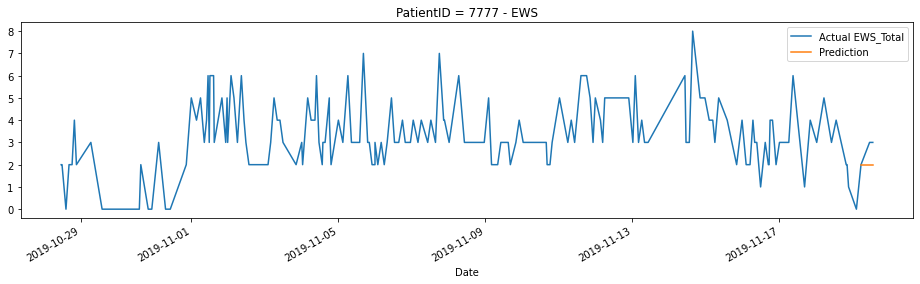

EWS Score prediction :

Accurate = 		 33.33333333333333 %
Accurate + 1 off = 	 100.0 %
Accurate + max 2 off = 	 100.0 %


In [164]:
EWSmultiARIMA(7777, ('2019-10-28', '2019-11-19'), 3, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )

In [56]:
#EWSmultiARIMA(7777, ('2019-10-28', '2019-11-19'), 185, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )